# Import training data

In [12]:
import pickle

data_file = './training_data.p'
with open(data_file, mode='rb') as f:
    data = pickle.load(f)
    car_image_names = data['car_image_names']
    not_car_image_names = data['not_car_image_names']
    X_train = data['X_train']
    y_train = data['y_train']
    X_val = data['X_val']
    y_val = data['y_val']
    X_test = data['X_test']
    y_test = data['y_test']

# Exploring color space

## Import test images

In [21]:
test_image_names = glob.glob('test_images/*')

test_images = []
for idx, fname in enumerate(test_image_names):
    test_image = plt.imread(fname)
    test_images.append(test_image)

## RGB

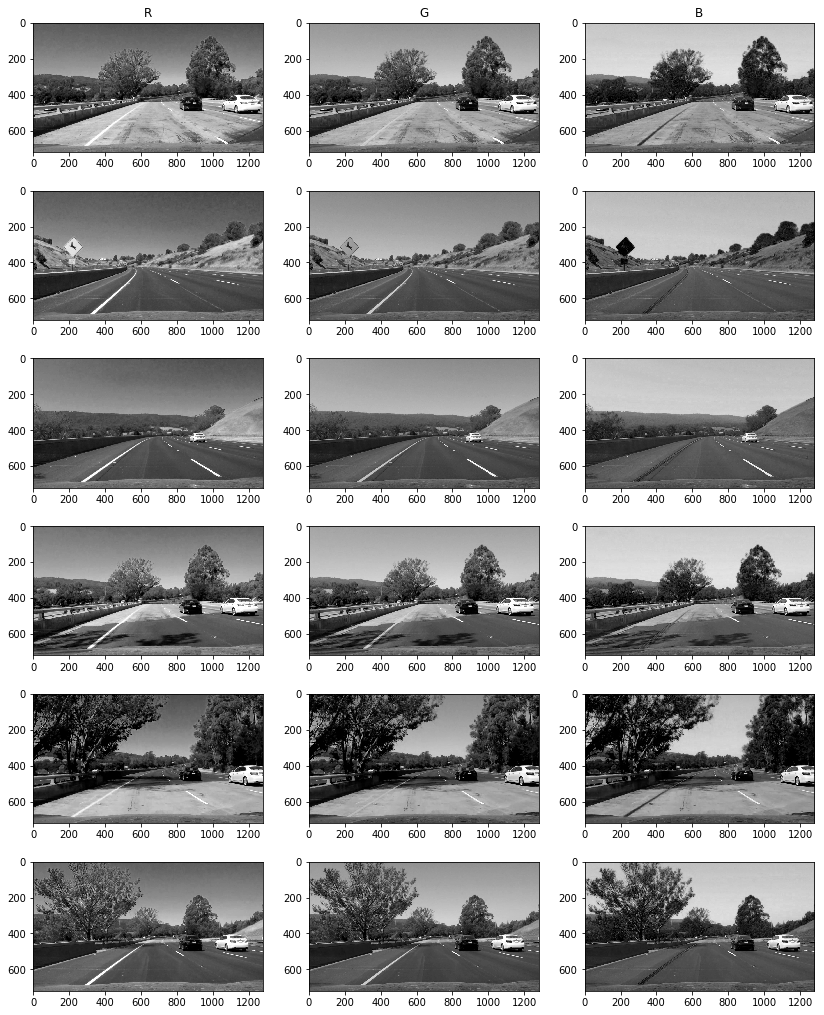

In [33]:
plt.figure(figsize=(14, 18))

for idx, image in enumerate(test_images):    
    plt.subplot(len(test_images), 3, idx*3+1)
    plt.imshow(image[:,:,0], cmap='gray')
    if (idx == 0):
        plt.title("R")
        
    plt.subplot(len(test_images), 3, idx*3+2)
    plt.imshow(image[:,:,1], cmap='gray')
    if (idx == 0):
        plt.title("G")
        
    plt.subplot(len(test_images), 3, idx*3+3)
    plt.imshow(image[:,:,2], cmap='gray')
    if (idx == 0):
        plt.title("B")
        
    # breaking early to reduce page size
    # break

plt.show()

Nothing stands out

## HSV

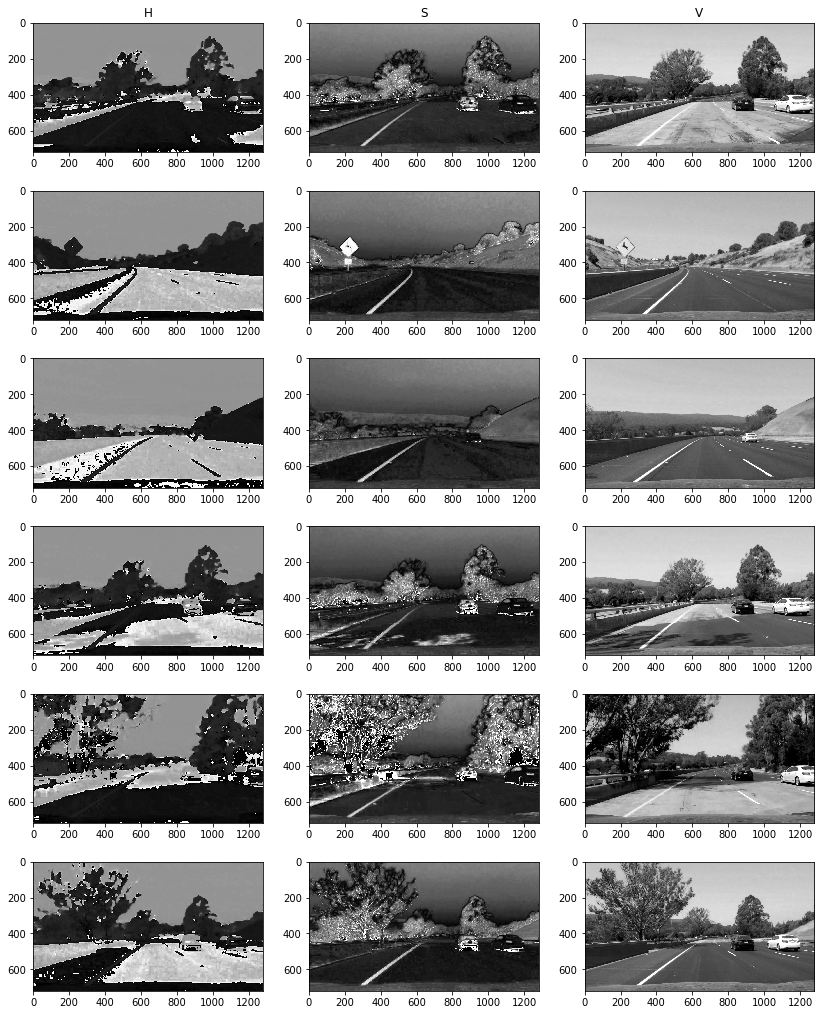

In [34]:
plt.figure(figsize=(14, 18))

for idx, image in enumerate(test_images):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    plt.subplot(len(test_images), 3, idx*3+1)
    plt.imshow(image[:,:,0], cmap='gray')
    if (idx == 0):
        plt.title("H")
        
    plt.subplot(len(test_images), 3, idx*3+2)
    plt.imshow(image[:,:,1], cmap='gray')
    if (idx == 0):
        plt.title("S")
        
    plt.subplot(len(test_images), 3, idx*3+3)
    plt.imshow(image[:,:,2], cmap='gray')
    if (idx == 0):
        plt.title("V")
        
    # breaking early to reduce page size
    #break

plt.show()

H channel and S seems to differentiate cars from road

## LUV

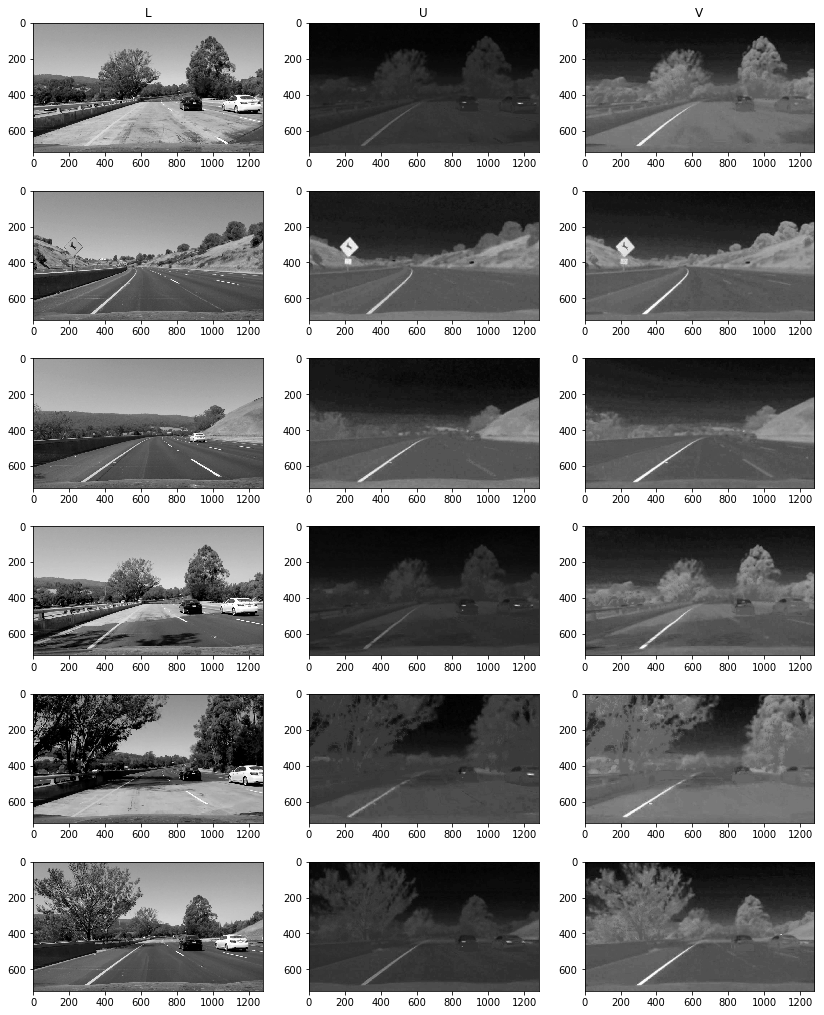

In [36]:
plt.figure(figsize=(14, 18))

for idx, image in enumerate(test_images):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
    plt.subplot(len(test_images), 3, idx*3+1)
    plt.imshow(image[:,:,0], cmap='gray')
    if (idx == 0):
        plt.title("L")
        
    plt.subplot(len(test_images), 3, idx*3+2)
    plt.imshow(image[:,:,1], cmap='gray')
    if (idx == 0):
        plt.title("U")
        
    plt.subplot(len(test_images), 3, idx*3+3)
    plt.imshow(image[:,:,2], cmap='gray')
    if (idx == 0):
        plt.title("V")
        
    # breaking early to reduce page size
    #break

plt.show()

Good at picking up the yellow lane line

## HLS

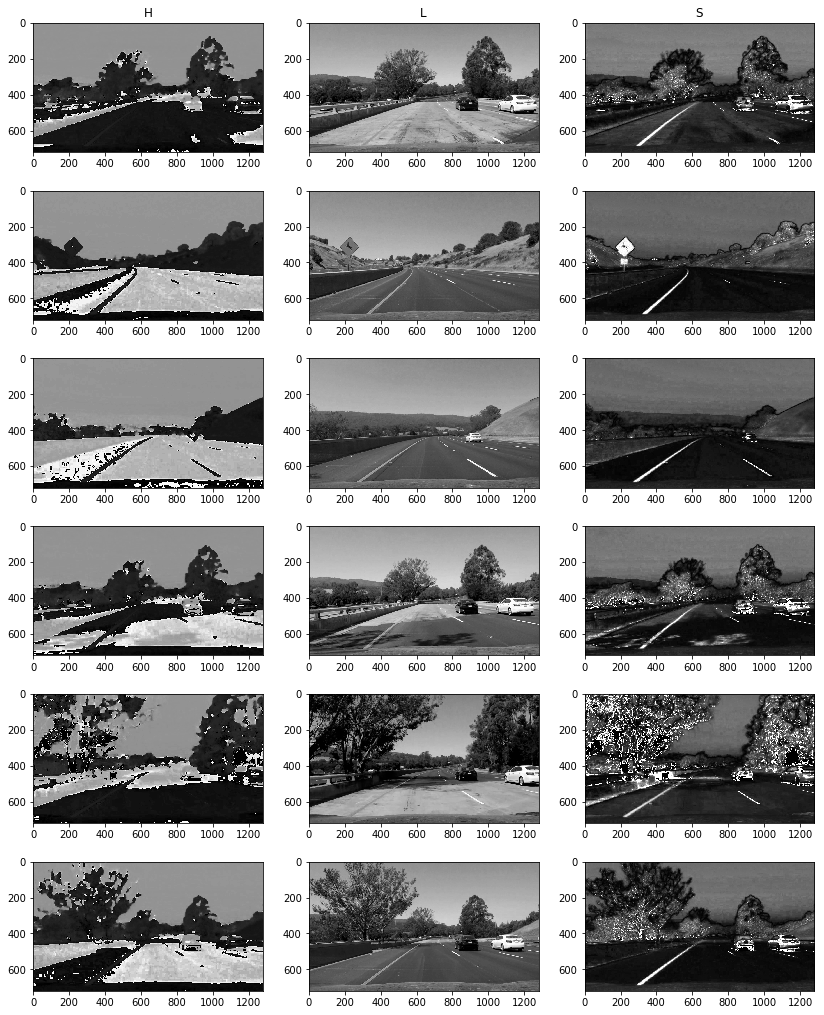

In [37]:
plt.figure(figsize=(14, 18))

for idx, image in enumerate(test_images):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    plt.subplot(len(test_images), 3, idx*3+1)
    plt.imshow(image[:,:,0], cmap='gray')
    if (idx == 0):
        plt.title("H")
        
    plt.subplot(len(test_images), 3, idx*3+2)
    plt.imshow(image[:,:,1], cmap='gray')
    if (idx == 0):
        plt.title("L")
        
    plt.subplot(len(test_images), 3, idx*3+3)
    plt.imshow(image[:,:,2], cmap='gray')
    if (idx == 0):
        plt.title("S")
        
    # breaking early to reduce page size
    #break

plt.show()

Similar the HSV color space. It seems to differentiate cars from road

## YUV

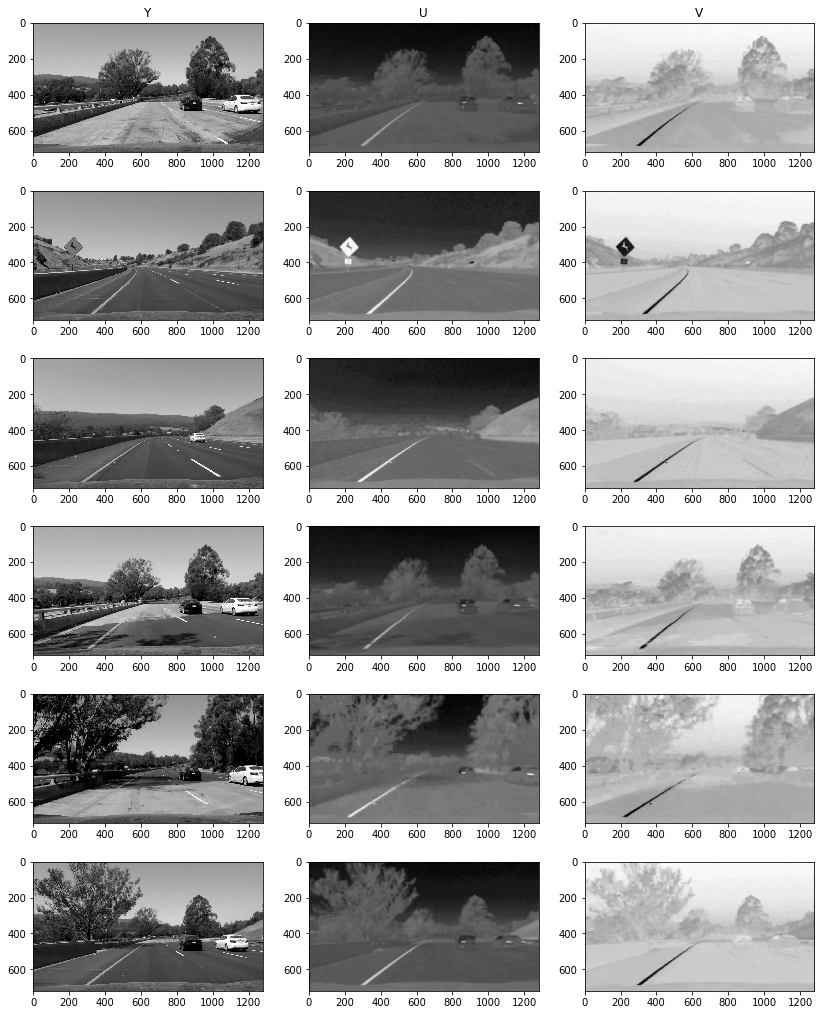

In [40]:
plt.figure(figsize=(14, 18))

for idx, image in enumerate(test_images):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    plt.subplot(len(test_images), 3, idx*3+1)
    plt.imshow(image[:,:,0], cmap='gray')
    if (idx == 0):
        plt.title("Y")
        
    plt.subplot(len(test_images), 3, idx*3+2)
    plt.imshow(image[:,:,1], cmap='gray')
    if (idx == 0):
        plt.title("U")
        
    plt.subplot(len(test_images), 3, idx*3+3)
    plt.imshow(image[:,:,2], cmap='gray')
    if (idx == 0):
        plt.title("V")
        
    # breaking early to reduce page size
    #break

plt.show()

Brilliant at picking out the yellow lane line and the yellow sign. Not so much the vehicles

## YCrCb

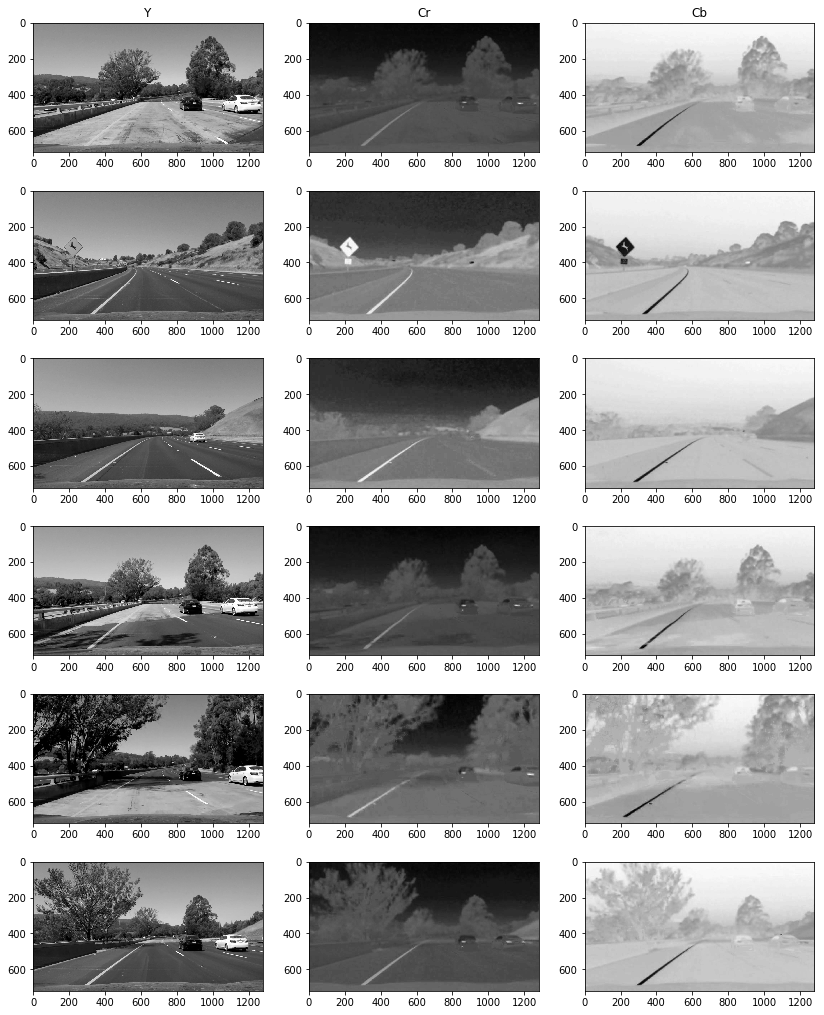

In [39]:
plt.figure(figsize=(14, 18))

for idx, image in enumerate(test_images):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
    plt.subplot(len(test_images), 3, idx*3+1)
    plt.imshow(image[:,:,0], cmap='gray')
    if (idx == 0):
        plt.title("Y")
        
    plt.subplot(len(test_images), 3, idx*3+2)
    plt.imshow(image[:,:,1], cmap='gray')
    if (idx == 0):
        plt.title("Cr")
        
    plt.subplot(len(test_images), 3, idx*3+3)
    plt.imshow(image[:,:,2], cmap='gray')
    if (idx == 0):
        plt.title("Cb")
        
    # breaking early to reduce page size
    #break

plt.show()

Similar to the YUV color space

## Color space summary

From visual inspection. HLS and HSV seems to be best at distinguish between cars and the road. The colors also look very similar. HSV color space will be used for rest of the project.

# Exploring HOG

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from skimage.feature import hog

In [ ]:
# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                                  visualise=True, feature_vector=False)
        return features, hog_image
    else:
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                       visualise=False, feature_vector=feature_vec)
        return features

In [126]:
# Generate a random index to look at a car image
car_ind = np.random.randint(0, len(car_image_names))
not_car_ind = np.random.randint(0, len(not_car_image_names))

# Read in the image
car_image = mpimg.imread(car_image_names[car_ind])
not_car_image = mpimg.imread(not_car_image_names[not_car_ind])

# Covert to HLS color space
car_image = cv2.cvtColor(car_image, cv2.COLOR_RGB2HSV)
not_car_image = cv2.cvtColor(not_car_image, cv2.COLOR_RGB2HSV)

# Define HOG parameters
orient = 8
pix_per_cell = 8
cell_per_block = 3

# Call our function with vis=True to see an image output
_, hog_car_image_H = get_hog_features(car_image[:,:,0], orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)
_, hog_car_image_S = get_hog_features(car_image[:,:,1], orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)
_, hog_car_image_V = get_hog_features(car_image[:,:,2], orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)

_, hog_not_car_image_H = get_hog_features(not_car_image[:,:,0], orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)
_, hog_not_car_image_S = get_hog_features(not_car_image[:,:,0], orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)
_, hog_not_car_image_V = get_hog_features(not_car_image[:,:,0], orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)

C:\ProgramData\Miniconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


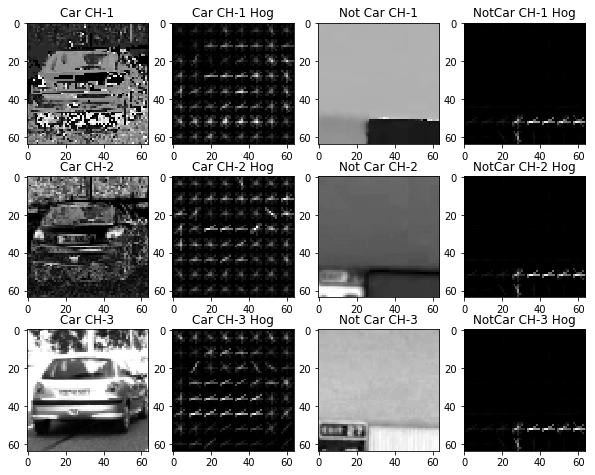

In [127]:
plt.figure(figsize=(10, 8))

plt.subplot(3, 4, 1)
plt.imshow(car_image[:,:,0], cmap='gray')
plt.title("Car CH-1")

plt.subplot(3, 4, 2)
plt.imshow(hog_car_image_H, cmap='gray')
plt.title("Car CH-1 Hog")

plt.subplot(3, 4, 3)
plt.imshow(not_car_image[:,:,0], cmap='gray')
plt.title("Not Car CH-1")

plt.subplot(3, 4, 4)
plt.imshow(hog_not_car_image_H, cmap='gray')
plt.title("NotCar CH-1 Hog")

#--------------------------------------------
plt.subplot(3, 4, 5)
plt.imshow(car_image[:,:,1], cmap='gray')
plt.title("Car CH-2")

plt.subplot(3, 4, 6)
plt.imshow(hog_car_image_S, cmap='gray')
plt.title("Car CH-2 Hog")

plt.subplot(3, 4, 7)
plt.imshow(not_car_image[:,:,1], cmap='gray')
plt.title("Not Car CH-2")

plt.subplot(3, 4, 8)
plt.imshow(hog_not_car_image_S, cmap='gray')
plt.title("NotCar CH-2 Hog")

#--------------------------------------------
plt.subplot(3, 4, 9)
plt.imshow(car_image[:,:,2], cmap='gray')
plt.title("Car CH-3")

plt.subplot(3, 4, 10)
plt.imshow(hog_car_image_V, cmap='gray')
plt.title("Car CH-3 Hog")

plt.subplot(3, 4, 11)
plt.imshow(not_car_image[:,:,2], cmap='gray')
plt.title("Not Car CH-3")

plt.subplot(3, 4, 12)
plt.imshow(hog_not_car_image_V, cmap='gray')
plt.title("NotCar CH-3 Hog")

plt.show()